In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [2]:
Original_Data = pd.read_csv('incomeData.csv')

In [3]:
Original_Data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,29948.000000,2.994800e+04,29948.000000,29948.000000,29948.000000,29948.000000
mean,38.677708,1.873163e+05,10.183551,1109.303326,89.173534,40.468011
std,13.694872,1.045607e+05,2.421424,7516.780987,407.171146,12.412841
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.166080e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.769680e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.342308e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
Original_Data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
Original_Data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Income'],
      dtype='object')

In [6]:
Original_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29948 entries, 0 to 29947
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             29948 non-null  int64 
 1   workclass       29948 non-null  object
 2   fnlwgt          29948 non-null  int64 
 3   education       29948 non-null  object
 4   education-num   29948 non-null  int64 
 5   marital-status  29948 non-null  object
 6   occupation      29948 non-null  object
 7   relationship    29948 non-null  object
 8   race            29948 non-null  object
 9   sex             29948 non-null  object
 10  capital-gain    29948 non-null  int64 
 11  capital-loss    29948 non-null  int64 
 12  hours-per-week  29948 non-null  int64 
 13  native-country  29948 non-null  object
 14  Income          29948 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.4+ MB


In [7]:
Original_Data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

In [8]:
Original_Data.select_dtypes(include='object').columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country', 'Income'],
      dtype='object')

## Replacing ? with "unknown" in workclass, occupation, native-country of object data type

In [9]:
Original_Data['workclass'] = Original_Data['workclass'].str.replace("?","unknown")

In [10]:
Original_Data['occupation'] = Original_Data['occupation'].str.replace("?","unknown")

In [11]:
Original_Data['native-country'] = Original_Data['native-country'].str.replace("?","unknown")

## Checking wheather the data set is balanced or not

In [12]:
Original_Data.Income.value_counts("<50K")*100

Income
<=50K    75.350608
>50K     24.649392
Name: proportion, dtype: float64

#### Since our dataset is imbalanced so we'll perform oversampling using SMOTE

Text(0.5, 1.02, 'Count of TARGET by Income')

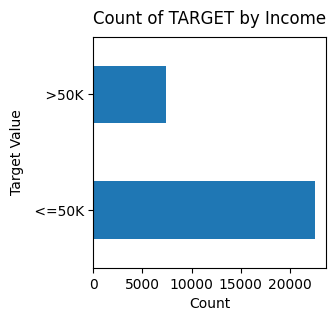

In [13]:
Original_Data.Income.value_counts().plot(kind = 'barh', figsize = (3,3))
plt.xlabel("Count")
plt.ylabel("Target Value")
plt.title("Count of TARGET by Income", y = 1.02)

### Finding % of Missing Values

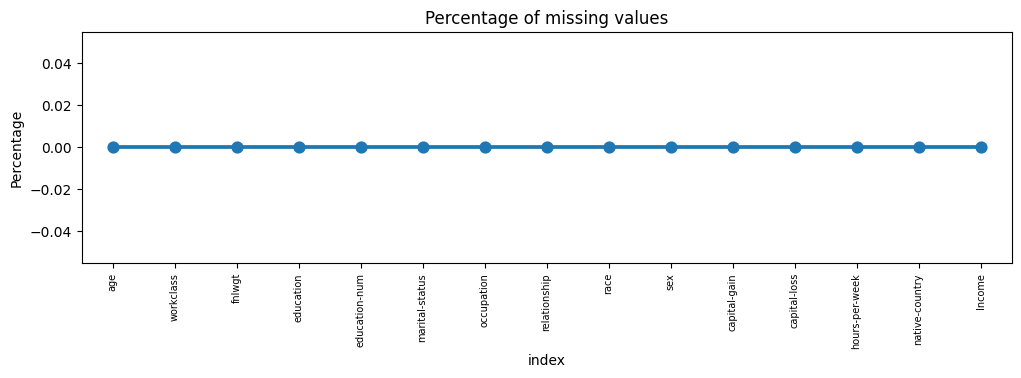

In [14]:
missing = pd.DataFrame((Original_Data.isnull().sum())*100/Original_Data.shape[0]).reset_index()
plt.figure(figsize=(12,3))
ax = sns.pointplot(x="index",y=0,data=missing)
plt.xticks(rotation=90, fontsize =7)
plt.title("Percentage of missing values")
plt.ylabel("Percentage")
plt.show()

## Exploratory Data Analysis

#### Univariate Analysis

<Figure size 640x480 with 0 Axes>

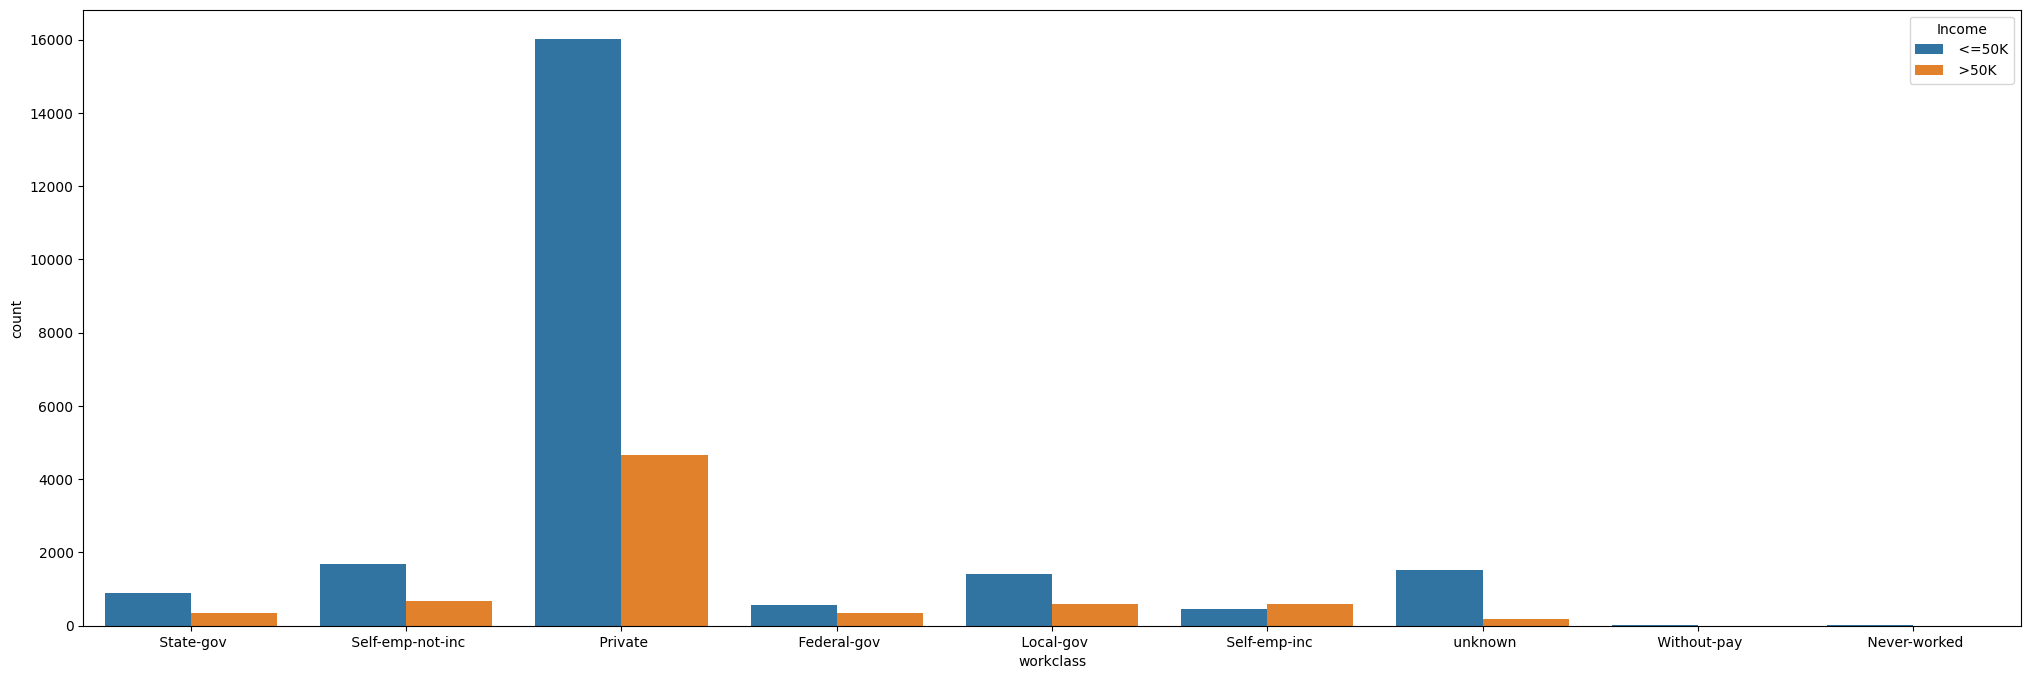

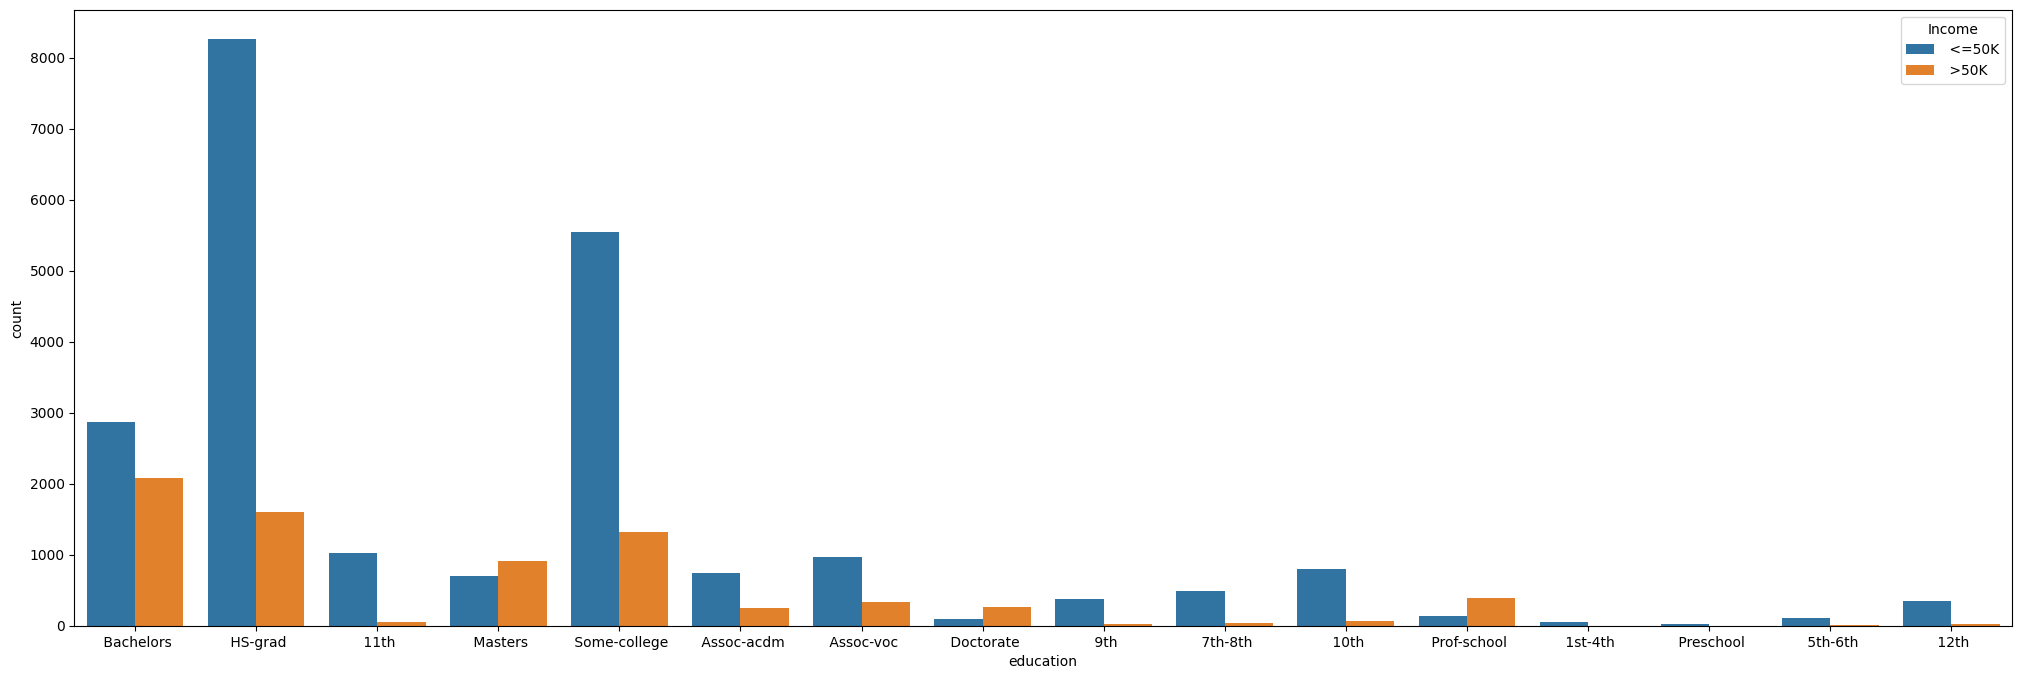

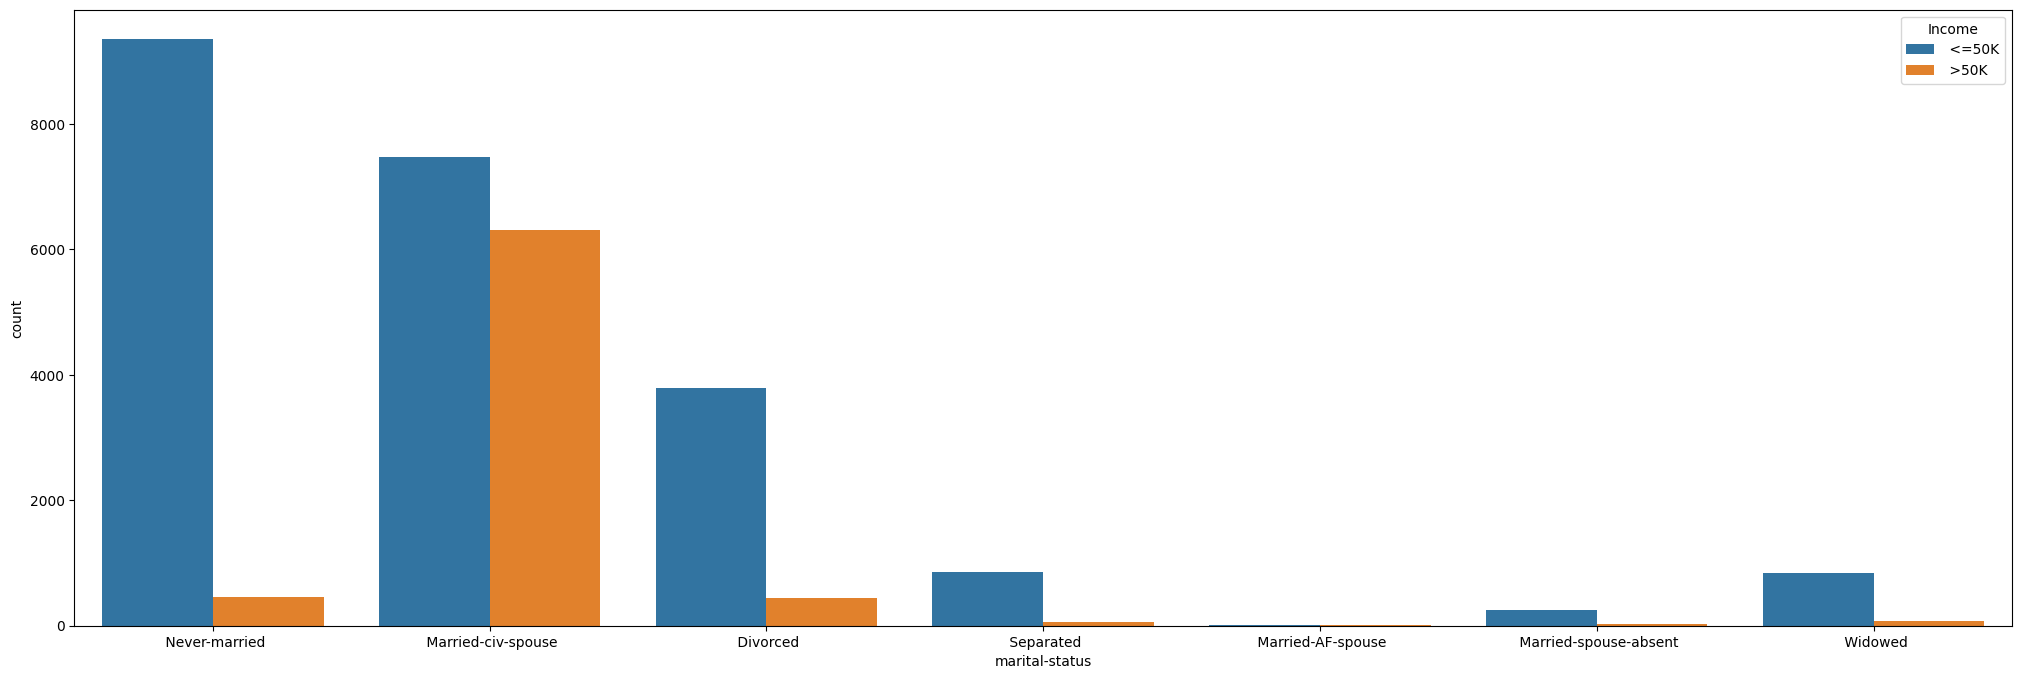

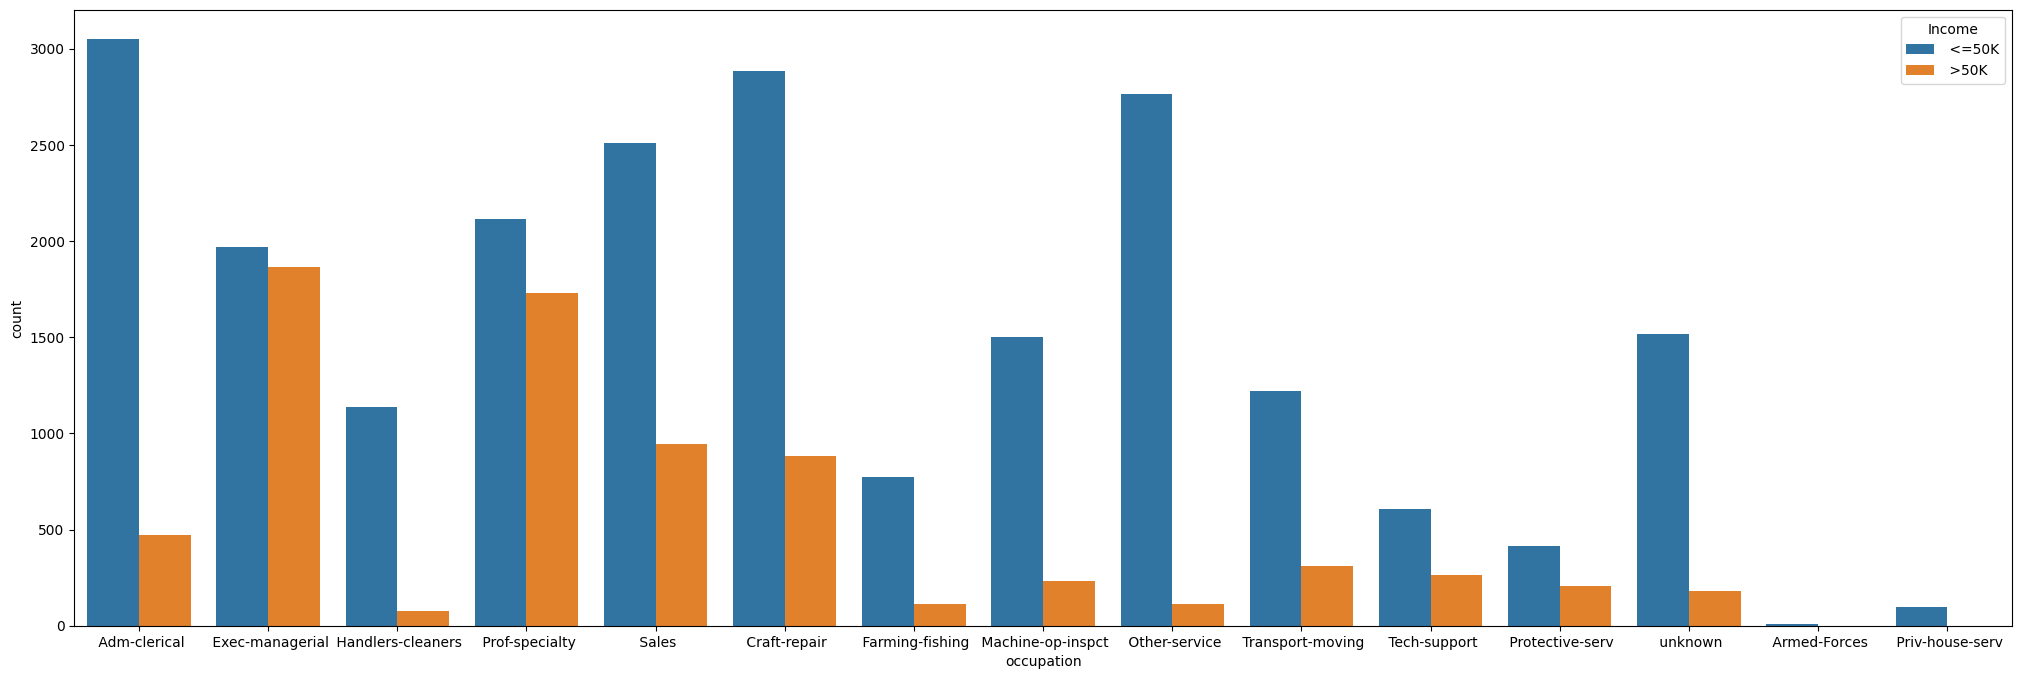

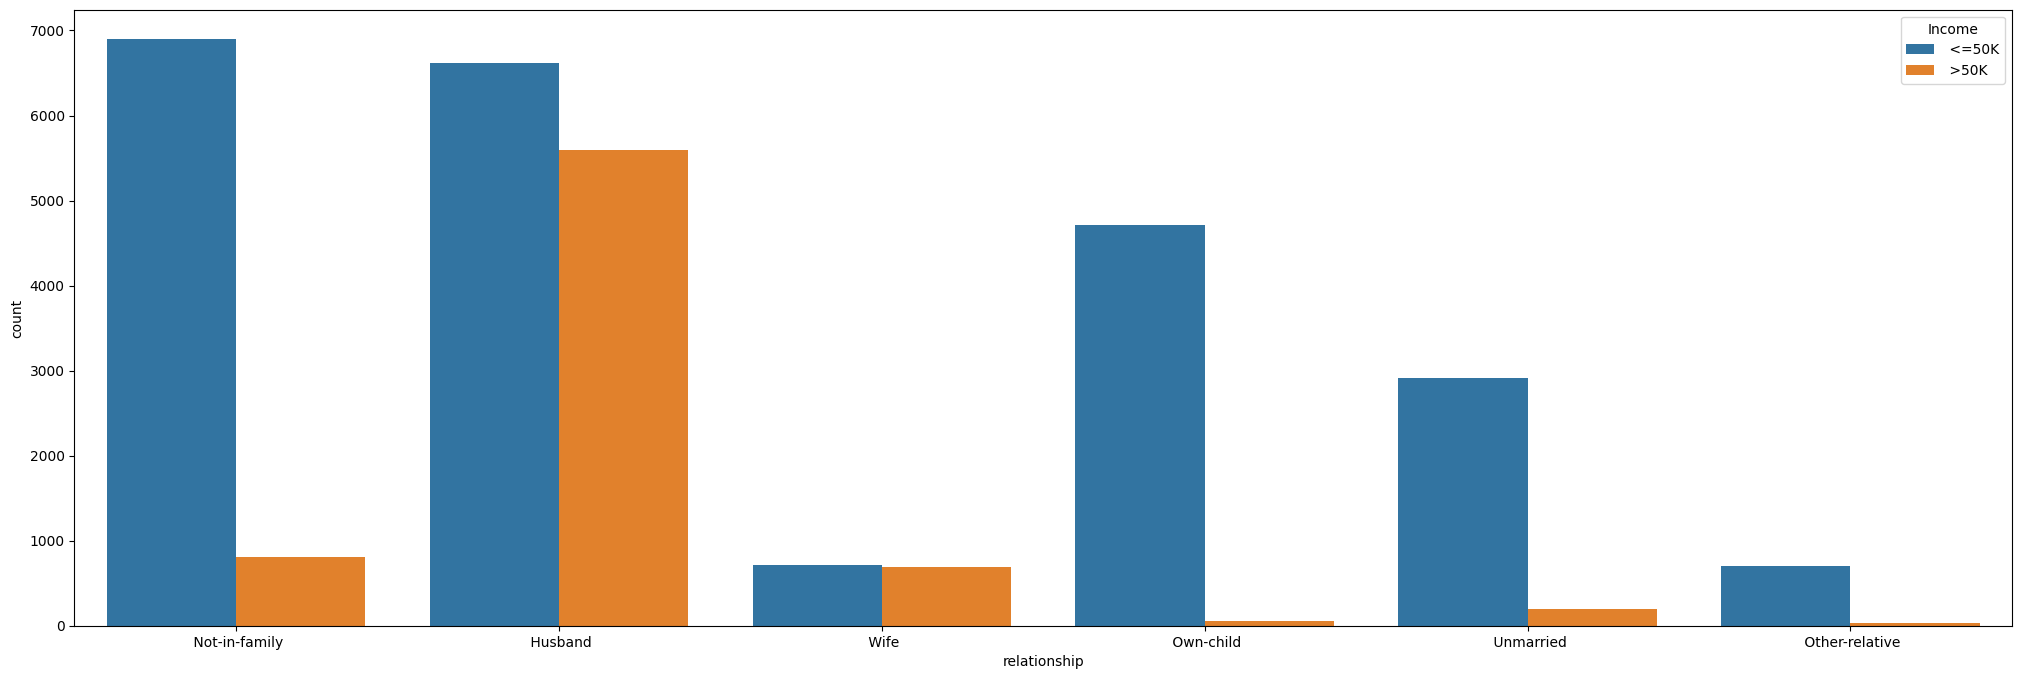

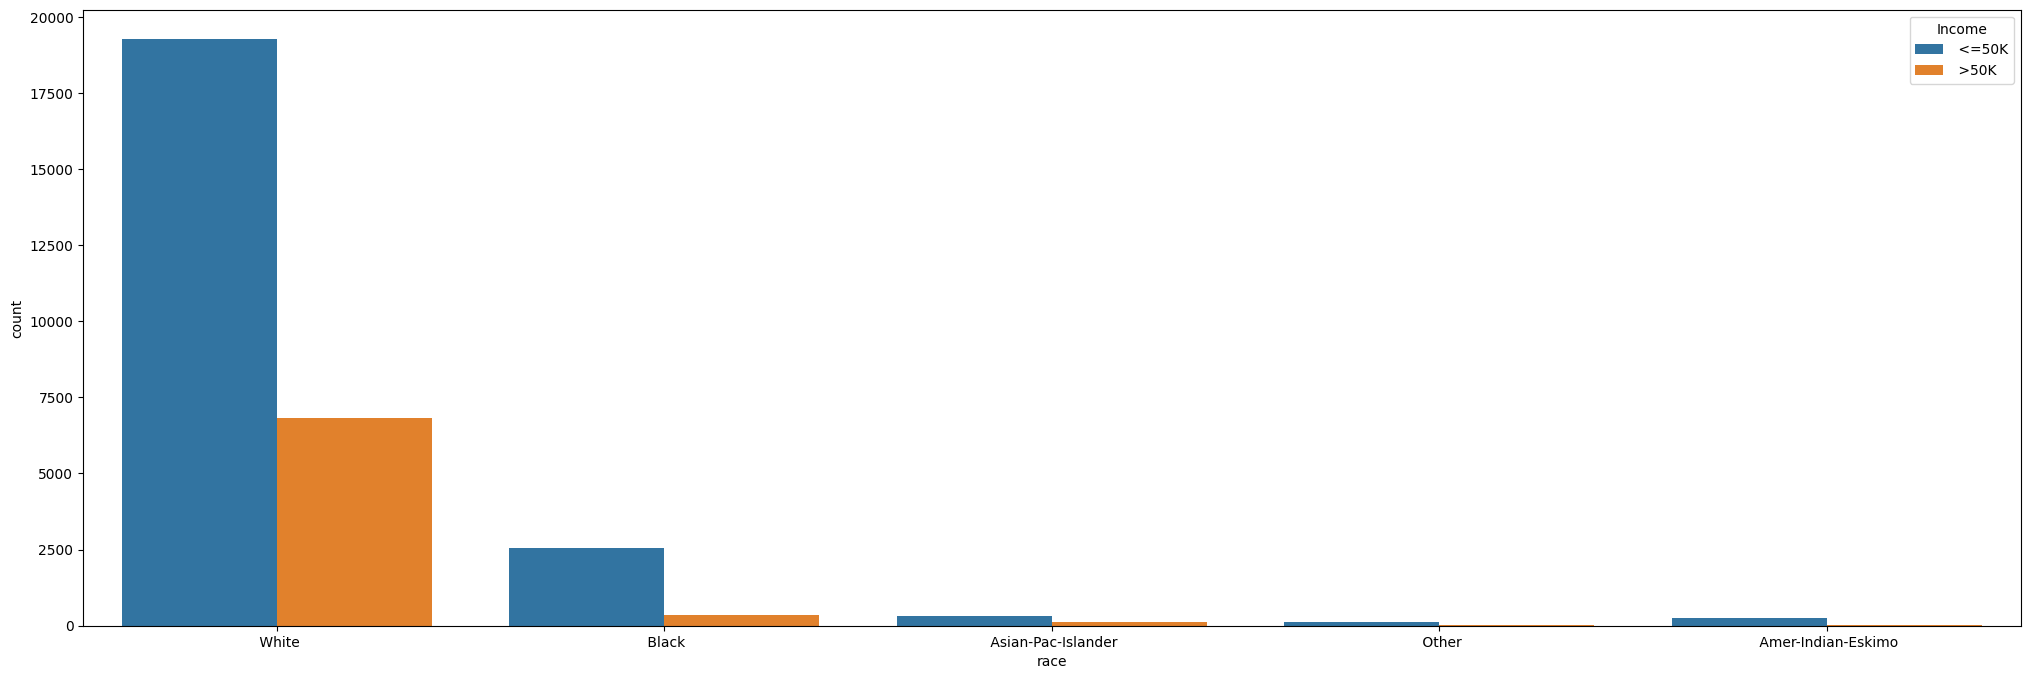

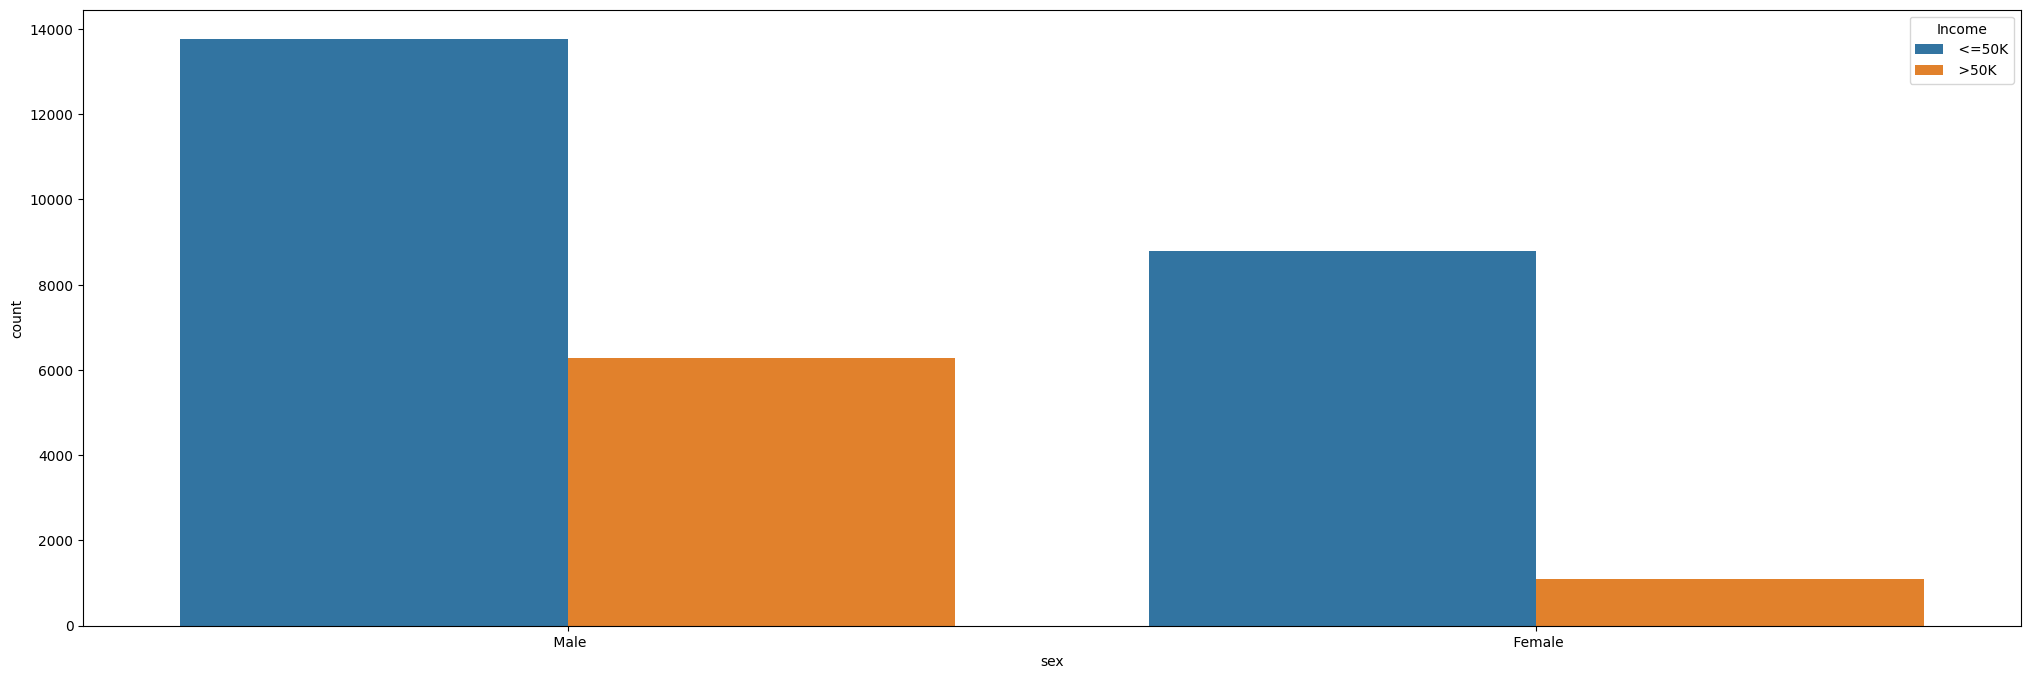

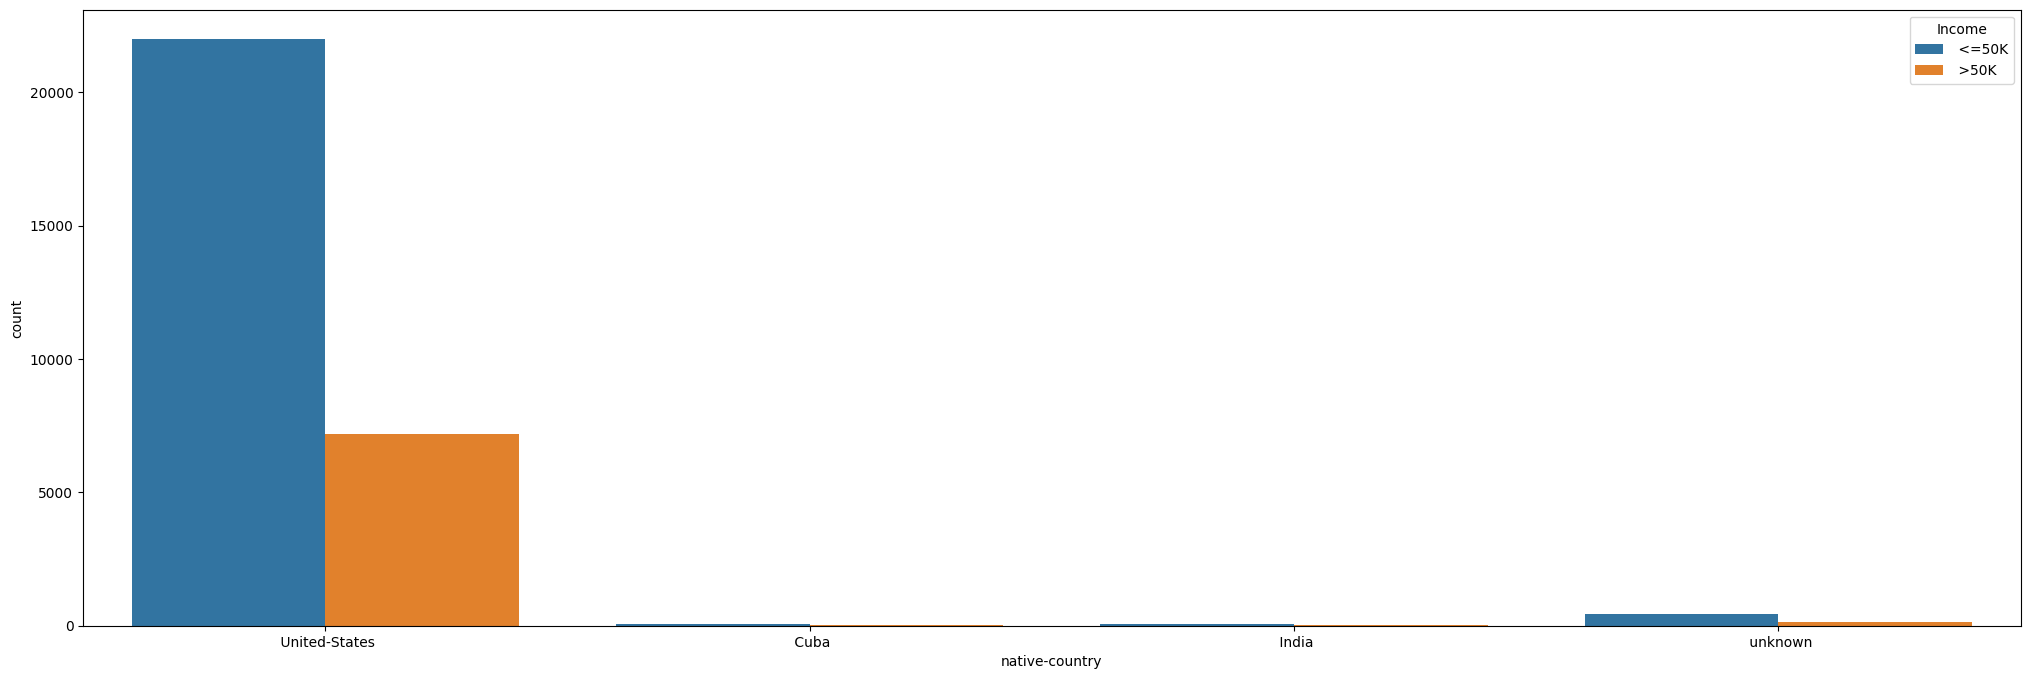

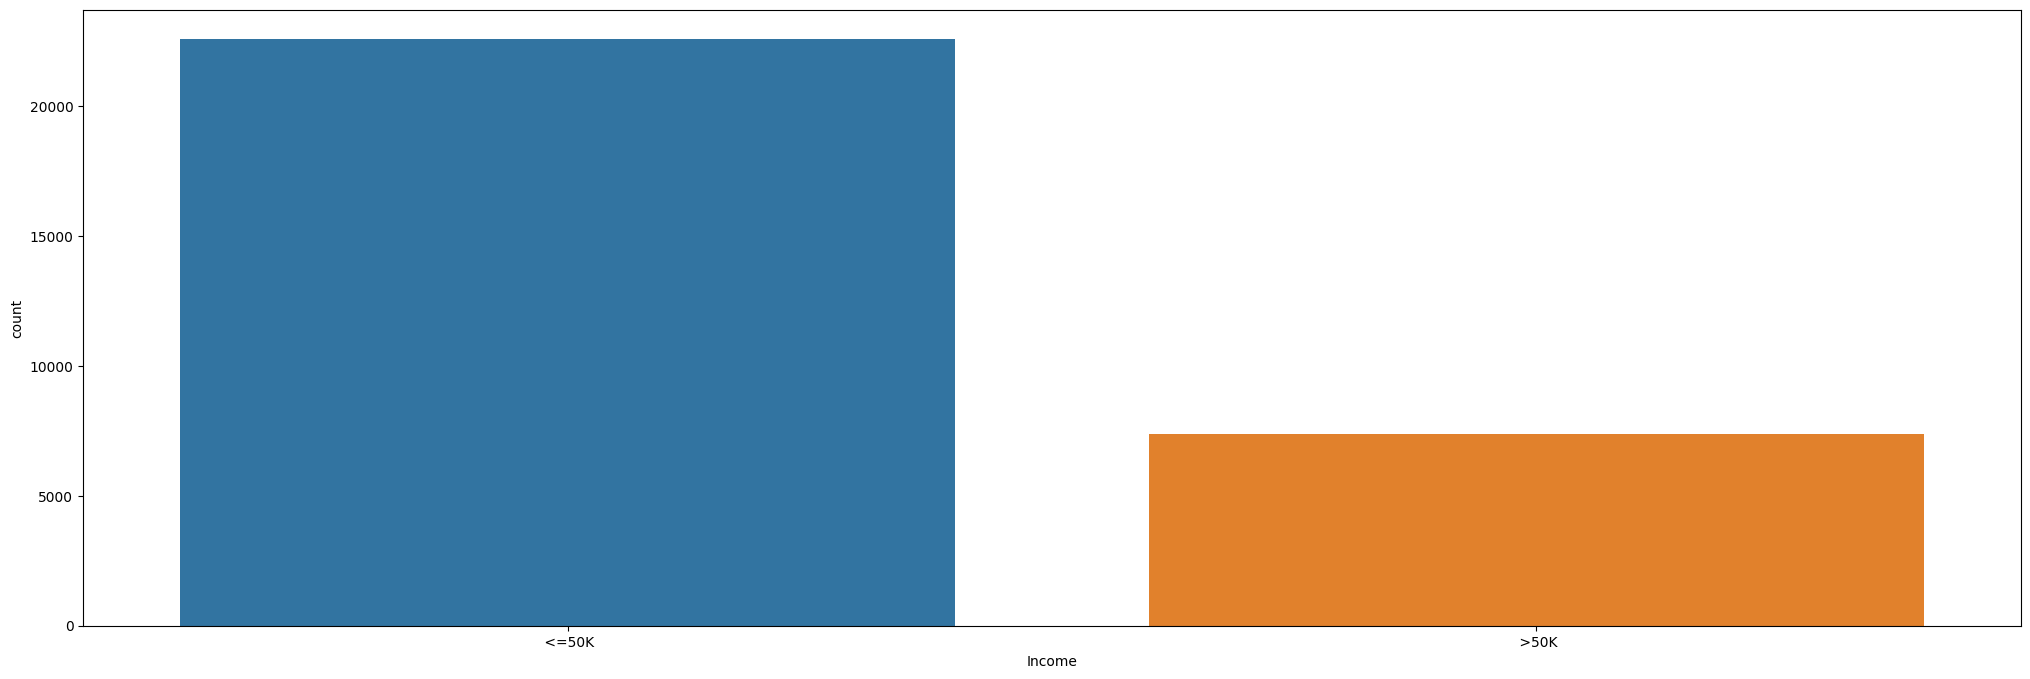

In [15]:
for i, predictor in enumerate(Original_Data.drop(columns=['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week'])):
    plt.figure(i)
    plt.figure(figsize=(25,8))
    sns.countplot(data=Original_Data,x=predictor,hue='Income',)

In [16]:
Original_Data['native-country'].value_counts()

native-country
United-States    29170
unknown            583
India              100
Cuba                95
Name: count, dtype: int64

#### since most of of the data points belong to US so dropping other points

In [17]:
Original_Data['native-country'].unique()

array([' United-States', ' Cuba', ' India', ' unknown'], dtype=object)

In [18]:
Cuba_Index = Original_Data[Original_Data['native-country']==" Cuba"].index
India_Index = Original_Data[Original_Data['native-country']==" India"].index
Unknown_Index = Original_Data[Original_Data['native-country']==" unknown"].index

In [19]:
Original_Data.drop(Cuba_Index, inplace=True)

In [20]:
Original_Data.drop(India_Index, inplace=True)

In [21]:
Original_Data.drop(Unknown_Index, inplace=True)

#### Dropping Native country column since all the data poits belong to United-States

In [22]:
Original_Data.drop('native-country', axis =1, inplace=True)
Original_Data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,<=50K


#### Since Without-pay is 13, Married-AF-spouse is 23, Never-worked is 7, Armed-Forces is 9 so dropping these values also

In [23]:
without_pay_index = Original_Data[Original_Data['workclass']==' Without-pay'].index
Never_worked_index = Original_Data[Original_Data['workclass']==' Never-worked'].index
Married_AF_Spouse_index = Original_Data[Original_Data['marital-status']==' Married-AF-spouse'].index
Armed_forces_index = Original_Data[Original_Data['occupation']==" Armed-Forces"].index

In [24]:
Original_Data = Original_Data.drop(without_pay_index)

In [25]:
Original_Data=Original_Data.drop(Never_worked_index)

In [26]:
Original_Data=Original_Data.drop(Married_AF_Spouse_index)

In [27]:
Original_Data = Original_Data.drop(Armed_forces_index)

### One hot encoding with multiple categories

In [28]:
for col in Original_Data.columns:
    print(col, ": ",len(Original_Data[col].unique()),"Labels" )

age :  73 Labels
workclass :  7 Labels
fnlwgt :  19807 Labels
education :  16 Labels
education-num :  16 Labels
marital-status :  6 Labels
occupation :  14 Labels
relationship :  6 Labels
race :  5 Labels
sex :  2 Labels
capital-gain :  119 Labels
capital-loss :  89 Labels
hours-per-week :  94 Labels
Income :  2 Labels


In [29]:
pd.get_dummies(Original_Data,drop_first=True).shape

(29118, 56)

### 56 new variables are created, if we directly perform one hot encoding to the data

#### Top 10 most frequent categories for the variable in education

In [30]:
Original_Data['education'].value_counts().sort_values(ascending=False).head(10)

education
HS-grad         9676
Some-college    6730
Bachelors       4761
Masters         1526
Assoc-voc       1288
11th            1066
Assoc-acdm       979
10th             846
Prof-school      502
7th-8th          497
Name: count, dtype: int64

In [31]:
Top_10_education = [
    x for x in Original_Data['education'].value_counts().sort_values(ascending=False).head(10).index]
Top_10_education

[' HS-grad',
 ' Some-college',
 ' Bachelors',
 ' Masters',
 ' Assoc-voc',
 ' 11th',
 ' Assoc-acdm',
 ' 10th',
 ' Prof-school',
 ' 7th-8th']

In [32]:
for label in Top_10_education:
    Original_Data[label] = np.where(Original_Data['education']==label,1,0)

Original_Data[['education']+Top_10_education].head()

,education,HS-grad,Some-college,Bachelors,Masters,Assoc-voc,11th,Assoc-acdm,10th,Prof-school,7th-8th
0,Bachelors,0,0,1,0,0,0,0,0,0,0
1,Bachelors,0,0,1,0,0,0,0,0,0,0
2,HS-grad,1,0,0,0,0,0,0,0,0,0
3,11th,0,0,0,0,0,1,0,0,0,0
5,Masters,0,0,0,1,0,0,0,0,0,0


In [33]:
Original_Data.drop("education", axis=1, inplace=True)

In [34]:
Original_Data.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,...,HS-grad,Some-college,Bachelors,Masters,Assoc-voc,11th,Assoc-acdm,10th,Prof-school,7th-8th
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,...,0,0,1,0,0,0,0,0,0,0
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,...,0,0,1,0,0,0,0,0,0,0
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,...,1,0,0,0,0,0,0,0,0,0
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,...,0,0,0,0,0,1,0,0,0,0
5,37,Private,284582,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,...,0,0,0,1,0,0,0,0,0,0


#### Top 10 most frequent categories for the variable in occupation

In [35]:
Original_Data.occupation.value_counts().sort_values(ascending=False).head(10)

occupation
Exec-managerial      3734
Prof-specialty       3690
Craft-repair         3681
Adm-clerical         3442
Sales                3362
Other-service        2772
Machine-op-inspct    1686
unknown              1657
Transport-moving     1489
Handlers-cleaners    1188
Name: count, dtype: int64

In [36]:
Top_10_Occupation = [x for x in Original_Data.occupation.value_counts().sort_values(ascending=False).head(10).index]

In [37]:
for label in Top_10_Occupation:
    Original_Data[label] = np.where(Original_Data["occupation"]==label,1,0)
Original_Data[['occupation']+Top_10_Occupation].head()

,occupation,Exec-managerial,Prof-specialty,Craft-repair,Adm-clerical,Sales,Other-service,Machine-op-inspct,unknown,Transport-moving,Handlers-cleaners
0,Adm-clerical,0,0,0,1,0,0,0,0,0,0
1,Exec-managerial,1,0,0,0,0,0,0,0,0,0
2,Handlers-cleaners,0,0,0,0,0,0,0,0,0,1
3,Handlers-cleaners,0,0,0,0,0,0,0,0,0,1
5,Exec-managerial,1,0,0,0,0,0,0,0,0,0


In [38]:
Original_Data.drop('occupation', axis = 1, inplace=True)

## Final Dataset after data cleansing

In [39]:
Final_dataset = pd.get_dummies(Original_Data,drop_first=True)
Final_dataset.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,HS-grad,Some-college,Bachelors,Masters,...,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,Income_ >50K
0,39,77516,13,2174,0,40,0,0,1,0,...,False,False,False,False,False,False,False,True,True,False
1,50,83311,13,0,0,13,0,0,1,0,...,False,False,False,False,False,False,False,True,True,False
2,38,215646,9,0,0,40,1,0,0,0,...,False,False,False,False,False,False,False,True,True,False
3,53,234721,7,0,0,40,0,0,0,0,...,False,False,False,False,False,True,False,False,True,False
5,37,284582,14,0,0,40,0,0,0,1,...,False,False,False,True,False,False,False,True,False,False


In [40]:
Final_dataset.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,HS-grad,Some-college,Bachelors,Masters,...,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,Income_ >50K
age,1.000000,-0.069287,0.032933,0.077384,0.057358,0.071367,0.020257,-0.110027,0.006575,0.097478,...,-0.058953,-0.443743,0.042567,0.020668,-0.011933,-0.017989,-0.035122,0.029935,0.097005,0.235240
fnlwgt,-0.069287,1.000000,-0.012363,0.004230,-0.008103,-0.019563,0.003173,-0.001682,-0.001447,-0.015761,...,0.007956,0.019114,0.002306,-0.010579,-0.053045,0.130494,0.001300,-0.081056,0.017196,0.002107
education-num,0.032933,-0.012363,1.000000,0.127688,0.079027,0.162149,-0.344752,-0.039051,0.522209,0.375950,...,-0.058056,-0.120994,-0.059770,0.039242,0.020171,-0.096184,-0.015545,0.094661,0.013346,0.335814
capital-gain,0.077384,0.004230,0.127688,1.000000,-0.032224,0.078583,-0.049868,-0.035291,0.043153,0.048498,...,-0.016734,-0.055337,-0.030922,0.017513,-0.003901,-0.021669,-0.001078,0.023056,0.050087,0.222734
capital-loss,0.057358,-0.008103,0.079027,-0.032224,1.000000,0.051528,-0.026808,-0.023576,0.033939,0.046589,...,-0.014377,-0.052330,-0.039378,0.019129,-0.011477,-0.024713,-0.007295,0.031376,0.044564,0.148984
hours-per-week,0.071367,-0.019563,0.162149,0.078583,0.051528,1.000000,0.008562,-0.070189,0.080367,0.070499,...,-0.052848,-0.258819,-0.036164,-0.064718,-0.013120,-0.056596,-0.010730,0.058279,0.233614,0.232794
HS-grad,0.020257,0.003173,-0.344752,-0.049868,-0.026808,0.008562,1.000000,-0.386792,-0.311899,-0.165906,...,0.040043,-0.030940,0.043640,-0.004497,-0.015390,0.035603,-0.005343,-0.030476,0.017711,-0.135330
Some-college,-0.110027,-0.001682,-0.039051,-0.035291,-0.023576,-0.070189,-0.386792,1.000000,-0.242402,-0.128939,...,-0.010247,0.113923,0.006522,-0.012369,0.014317,0.004843,0.002680,-0.011740,-0.062126,-0.067896
Bachelors,0.006575,-0.001447,0.522209,0.043153,0.033939,0.080367,-0.311899,-0.242402,1.000000,-0.103974,...,-0.028214,-0.073089,-0.064646,0.016848,0.017015,-0.055275,-0.008519,0.054910,0.029907,0.181423
Masters,0.097478,-0.015761,0.375950,0.048498,0.046589,0.070499,-0.165906,-0.128939,-0.103974,1.000000,...,-0.027620,-0.079821,-0.018090,0.022402,-0.005109,-0.037558,-0.008726,0.042276,0.004028,0.175277


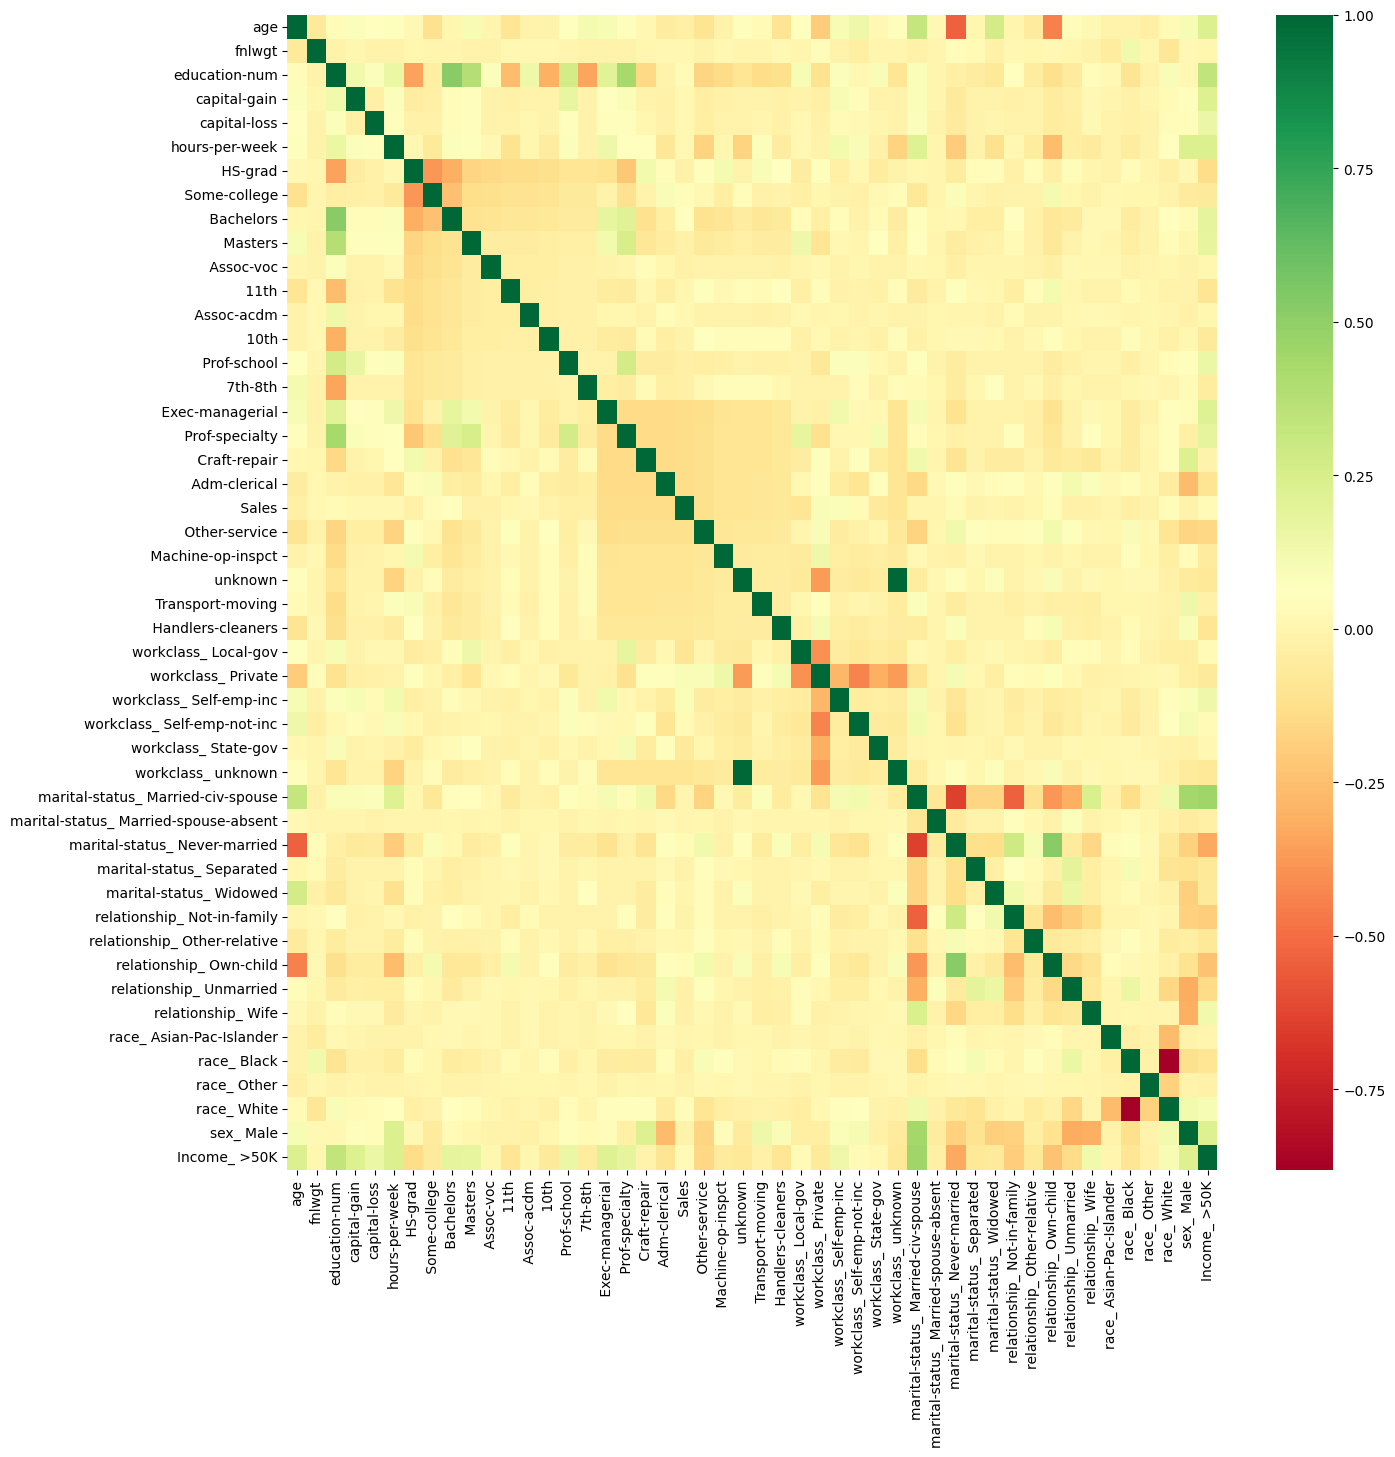

In [41]:
CorrMatrix = Final_dataset.corr()
top_corr_features = CorrMatrix.index
plt.figure(figsize=(15,15))
g = sns.heatmap(Final_dataset[top_corr_features].corr(),annot=False,cmap="RdYlGn")

In [42]:
X = Final_dataset.iloc[:,0:-1]
y = Final_dataset['Income_ >50K']

## Feature Importance

In [43]:
from sklearn.ensemble import ExtraTreesRegressor
Model = ExtraTreesRegressor()
Model.fit(X,y)

ExtraTreesRegressor()

In [44]:
print(Model.feature_importances_)

[0.13298794 0.15588348 0.0593522  0.08943443 0.02897051 0.08656129
 0.00540083 0.00595105 0.02423703 0.00676309 0.0032507  0.00139766
 0.00300059 0.00094817 0.00241149 0.0008559  0.02089599 0.01945923
 0.00844318 0.00641458 0.00918696 0.00468267 0.00502992 0.00176838
 0.00618851 0.00377871 0.00849078 0.01497207 0.00722142 0.01037724
 0.00701431 0.00172702 0.20540854 0.00095626 0.00395183 0.00181265
 0.00178802 0.00346714 0.00170554 0.00274495 0.00248404 0.0064898
 0.00236406 0.00583672 0.00065949 0.00762324 0.00965041]


### plot graph of feature importance for better visualization

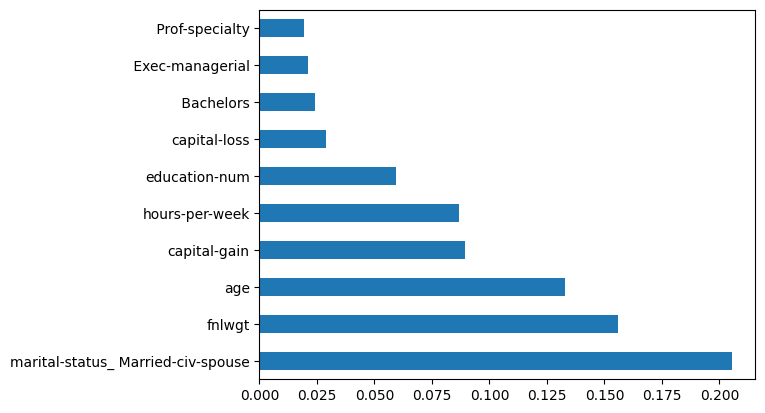

In [45]:
feature_importance = pd.Series(Model.feature_importances_, index = X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.show()

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y,test_size=0.25)

In [47]:
X_train.shape

(21838, 47)

In [48]:
y_train.shape

(21838,)

### Oversampling using SMOTE

In [74]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [50]:
smote = SMOTE(random_state=27)
smote_X_train, smote_y_train = smote.fit_resample(X_train,y_train)

In [51]:
print("Before:-", Counter(y_train))
print("After:-", Counter(smote_y_train))

Before:- Counter({False: 16468, True: 5370})
After:- Counter({False: 16468, True: 16468})


In [52]:
smote_X_test, smote_y_test = smote.fit_resample(X_test,y_test)

In [53]:
print("Before:-", Counter(y_test))
print("After:-", Counter(smote_y_test))

Before:- Counter({False: 5490, True: 1790})
After:- Counter({False: 5490, True: 5490})


## Model building and prediction without hyperparameter tunning 

In [61]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [62]:
rf.fit(smote_X_train,smote_y_train)

RandomForestClassifier()

In [63]:
y_pred = rf.predict(smote_X_test)

In [75]:
accuracy = accuracy_score(smote_y_test,y_pred)
precision = precision_score(smote_y_test,y_pred)
recall = recall_score(smote_y_test,y_pred)
F1 = f1_score(smote_y_test,y_pred)

In [76]:
print("Accuracy :", accuracy )
print("Precusion :", precision )
print("Recall :", recall )
print("F1 :", F1 )

Accuracy : 0.8949908925318761
Precusion : 0.9040432271287497
Recall : 0.8837887067395264
F1 : 0.8938012342267662


## Model building and prediction with hyperparameter tunning - OPTUNA (Bayesian concept)

In [93]:
import optuna
import itertools
import random
import warnings
warnings.filterwarnings('ignore')

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [99]:
def objective(trial):
    criterion    = trial.suggest_categorical("criterion",["gini","entropy"])
    max_depth    = trial.suggest_int("max_depth",2,32,log=True)
    n_estimators = trial.suggest_int("n_estimatros",100,500)
    
    random_forest_classifier = RandomForestClassifier(
    criterion = criterion,
    max_depth = max_depth,
    n_estimators = n_estimators)
    score = cross_val_score(random_forest_classifier, smote_X_train, smote_y_train, n_jobs=1, cv=3)
    accuracy1 = score.mean()
    return accuracy1

In [100]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials= 15)

[I 2024-07-14 20:41:32,125] A new study created in memory with name: no-name-2e172675-2c51-4a4c-852c-8bd303382a71
[I 2024-07-14 20:42:04,771] Trial 0 finished with value: 0.8493155996818937 and parameters: {'criterion': 'entropy', 'max_depth': 10, 'n_estimatros': 485}. Best is trial 0 with value: 0.8493155996818937.
[I 2024-07-14 20:42:14,832] Trial 1 finished with value: 0.8539610250815702 and parameters: {'criterion': 'entropy', 'max_depth': 12, 'n_estimatros': 131}. Best is trial 1 with value: 0.8539610250815702.
[I 2024-07-14 20:42:38,651] Trial 2 finished with value: 0.8481618045409989 and parameters: {'criterion': 'entropy', 'max_depth': 9, 'n_estimatros': 371}. Best is trial 1 with value: 0.8539610250815702.
[I 2024-07-14 20:43:02,189] Trial 3 finished with value: 0.846796148969491 and parameters: {'criterion': 'gini', 'max_depth': 17, 'n_estimatros': 287}. Best is trial 1 with value: 0.8539610250815702.
[I 2024-07-14 20:43:13,639] Trial 4 finished with value: 0.815643389775076 

In [104]:
trial = study.best_trial
print ("Accuracy: {}".format(trial.value))
print ("Best Param: {}".format(trial.params))

Accuracy: 0.8539610250815702
Best Param: {'criterion': 'entropy', 'max_depth': 12, 'n_estimatros': 131}


In [108]:
# optuna.visualization.plot_optimization_history(study)